In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('transactions_dataset.csv', sep=";")

In [3]:
df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


In [4]:
#Number of Records
df.shape

(63319315, 8)

In [5]:
df.dtypes

date_order        object
date_invoice      object
product_id         int64
client_id          int64
sales_net        float64
quantity           int64
order_channel     object
branch_id          int64
dtype: object

In [6]:
#Number of Unique Clients
len(df.client_id.unique())

170589

In [7]:
#Number of Unique Products
len(df.product_id.unique())

607418

In [8]:
#Distrubution Analysis
df.describe()

,product_id,client_id,sales_net,quantity,branch_id
count,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07
mean,1.632321e+06,1.139833e+06,1.479416e+02,9.215658e+01,5.466714e+03
std,9.184524e+05,6.552536e+05,8.646548e+02,8.674801e+02,3.175258e+03
min,1.500000e+01,6.000000e+00,-1.738817e+06,3.000000e+00,2.000000e+01
25%,8.517370e+05,5.658470e+05,1.414653e+01,3.000000e+00,2.907000e+03
50%,1.621731e+06,1.152241e+06,4.424280e+01,5.000000e+00,5.226000e+03
75%,2.434262e+06,1.706977e+06,1.314680e+02,2.100000e+01,8.361000e+03
max,3.238833e+06,2.274517e+06,1.740456e+06,1.980010e+05,1.105700e+04


In [9]:
#Data from
df.date_order.min()

'2017-09-22'

In [10]:
#Data to
df.date_order.max()

'2019-09-22'

In [11]:
df['date_order'] = pd.to_datetime(df['date_order'])

In [12]:
df['year'] = pd.DatetimeIndex(df['date_order']).year
df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,year
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732,2017
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279,2017
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184,2017
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200,2017
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051,2017


In [13]:
df['month'] = pd.DatetimeIndex(df['date_order']).month
df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,year,month
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732,2017,9
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279,2017,9
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184,2017,9
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200,2017,9
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051,2017,9


In [14]:
df['day'] = df['date_order'].dt.day_name()

In [15]:
df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,year,month,day
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732,2017,9,Monday
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279,2017,9,Monday
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184,2017,9,Monday
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200,2017,9,Monday
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051,2017,9,Monday


In [16]:
# Further explore ride counts on different time intervals (total data, day of month, day of week, hourly):

montly_sales = df.groupby(['month'])['sales_net'].sum()
daily_sale = df.groupby(['day'])['sales_net'].sum()
yearly_sale = df.groupby(['year'])['sales_net'].sum()

<AxesSubplot:xlabel='year', ylabel='sales_net'>

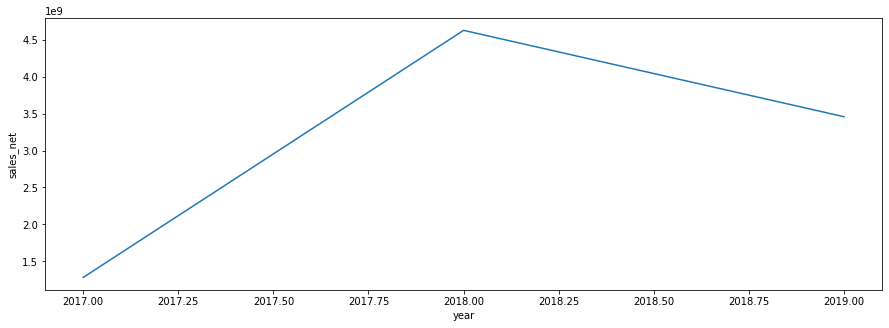

In [17]:
yearly_sale.plot.line(xlabel="year", ylabel="sales_net",figsize=(15, 5))

<AxesSubplot:xlabel='month', ylabel='sales_net'>

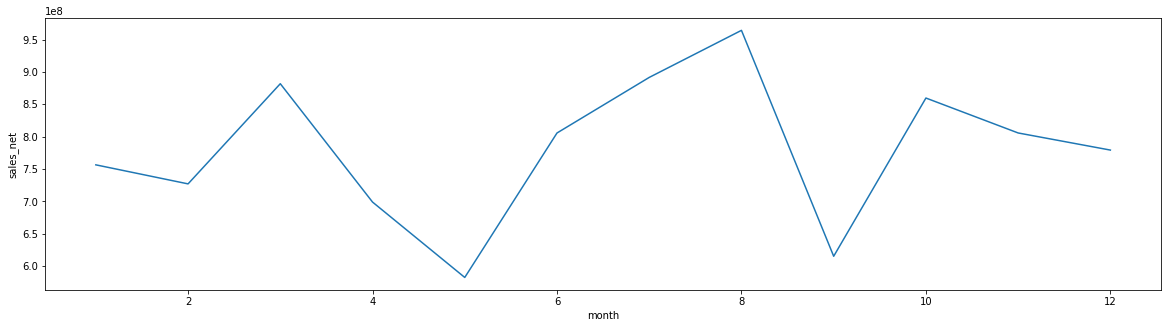

In [18]:
montly_sales.plot.line(xlabel="month", ylabel="sales_net",figsize=(20, 5))

#Cleaning duplicate data and execute

<AxesSubplot:xlabel='day', ylabel='sales_net'>

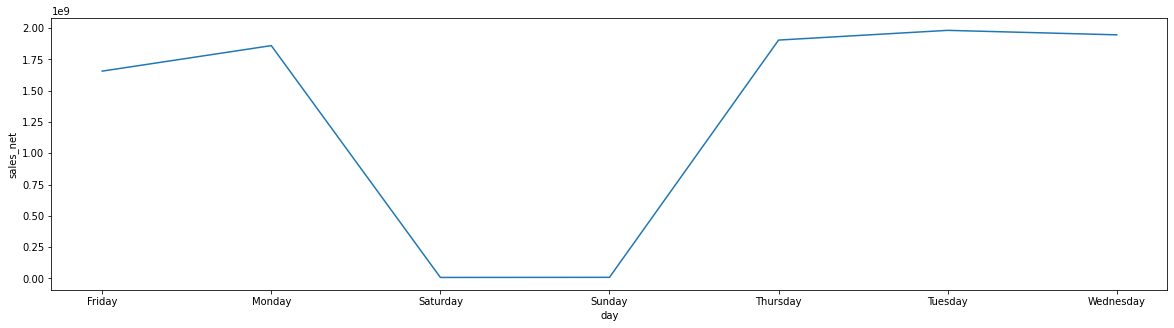

In [19]:
daily_sale.plot.line(xlabel="day", ylabel="sales_net",figsize=(20, 5))

In [20]:
del df["branch_id"]
del df["order_channel"]
del df["date_invoice"]

In [ ]:
del df["sales_net"]

In [ ]:
df['date_order'].max()

In [22]:
mask = (df['date_order'] > '2018-09-22') & (df['date_order'] <= '2019-09-22')

year1_df = df.loc[mask]
year1_df.head()

,date_order,product_id,client_id,sales_net,quantity,year,month,day
19509289,2018-12-03,2123484,1596632,2457.356800,17,2018,12,Monday
20186348,2018-12-03,1228251,1596632,6.568800,17,2018,12,Monday
24395967,2019-01-03,3145278,1837545,88.068095,43,2019,1,Thursday
24408392,2019-01-03,55547,1837545,86.501712,51,2019,1,Thursday
24421647,2019-01-03,2852871,1837545,9.660000,5,2019,1,Thursday


In [ ]:
del year1_df['InvoiceMonth']
del year1_df['CohortMonth']
del year1_df['CohortIndex']

In [23]:
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

year1_df['InvoiceMonth'] = year1_df['date_order'].apply(get_month)
grouping = year1_df.groupby('client_id')['InvoiceMonth']
year1_df['CohortMonth'] = grouping.transform('min')
year1_df.head()

<ipython-input-23-64e8b142d512>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year1_df['InvoiceMonth'] = year1_df['date_order'].apply(get_month)
<ipython-input-23-64e8b142d512>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year1_df['CohortMonth'] = grouping.transform('min')


,date_order,product_id,client_id,sales_net,quantity,year,month,day,InvoiceMonth,CohortMonth
19509289,2018-12-03,2123484,1596632,2457.356800,17,2018,12,Monday,2018-12-01,2018-09-01
20186348,2018-12-03,1228251,1596632,6.568800,17,2018,12,Monday,2018-12-01,2018-09-01
24395967,2019-01-03,3145278,1837545,88.068095,43,2019,1,Thursday,2019-01-01,2018-09-01
24408392,2019-01-03,55547,1837545,86.501712,51,2019,1,Thursday,2019-01-01,2018-09-01
24421647,2019-01-03,2852871,1837545,9.660000,5,2019,1,Thursday,2019-01-01,2018-09-01


In [ ]:
len(df[df['sales_net'] < 0])

In [24]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [25]:
invoice_year, invoice_month, _ = get_date_int(year1_df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(year1_df, 'CohortMonth')

In [26]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [27]:
year1_df['CohortIndex'] = years_diff * 12 + months_diff + 1

<ipython-input-27-79e0558c149d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year1_df['CohortIndex'] = years_diff * 12 + months_diff + 1


In [28]:
year1_df.head()

,date_order,product_id,client_id,sales_net,quantity,year,month,day,InvoiceMonth,CohortMonth,CohortIndex
19509289,2018-12-03,2123484,1596632,2457.356800,17,2018,12,Monday,2018-12-01,2018-09-01,4
20186348,2018-12-03,1228251,1596632,6.568800,17,2018,12,Monday,2018-12-01,2018-09-01,4
24395967,2019-01-03,3145278,1837545,88.068095,43,2019,1,Thursday,2019-01-01,2018-09-01,5
24408392,2019-01-03,55547,1837545,86.501712,51,2019,1,Thursday,2019-01-01,2018-09-01,5
24421647,2019-01-03,2852871,1837545,9.660000,5,2019,1,Thursday,2019-01-01,2018-09-01,5


In [29]:
## grouping customer berdasarkan masing masing cohort
grouping = year1_df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['client_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='client_id')

In [30]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2018-09-01,36907.0,32743.0,31529.0,30915.0,30012.0,29516.0,30076.0,29007.0,28206.0,29494.0,29796.0,29943.0,26452.0
2018-10-01,43408.0,26942.0,25698.0,24111.0,23157.0,24513.0,22088.0,21161.0,23893.0,24644.0,25308.0,18532.0,NaN
2018-11-01,14896.0,6410.0,5720.0,5193.0,5794.0,5035.0,4613.0,5448.0,5809.0,6052.0,3922.0,NaN,NaN
2018-12-01,9549.0,3388.0,2954.0,3180.0,2741.0,2514.0,3004.0,3158.0,3301.0,2088.0,NaN,NaN,NaN
2019-01-01,6463.0,1961.0,1980.0,1741.0,1528.0,1804.0,1949.0,2012.0,1258.0,NaN,NaN,NaN,NaN
2019-02-01,4999.0,1699.0,1338.0,1234.0,1342.0,1501.0,1556.0,968.0,NaN,NaN,NaN,NaN,NaN
2019-03-01,5305.0,1596.0,1216.0,1428.0,1465.0,1560.0,970.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01,3916.0,1146.0,1097.0,1152.0,1156.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01,2963.0,866.0,855.0,846.0,528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(2) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2018-09-01,100.0,89.0,85.0,84.0,81.0,80.0,81.0,79.0,76.0,80.0,81.0,81.0,72.0
2018-10-01,100.0,62.0,59.0,56.0,53.0,56.0,51.0,49.0,55.0,57.0,58.0,43.0,NaN
2018-11-01,100.0,43.0,38.0,35.0,39.0,34.0,31.0,37.0,39.0,41.0,26.0,NaN,NaN
2018-12-01,100.0,35.0,31.0,33.0,29.0,26.0,31.0,33.0,35.0,22.0,NaN,NaN,NaN
2019-01-01,100.0,30.0,31.0,27.0,24.0,28.0,30.0,31.0,19.0,NaN,NaN,NaN,NaN
2019-02-01,100.0,34.0,27.0,25.0,27.0,30.0,31.0,19.0,NaN,NaN,NaN,NaN,NaN
2019-03-01,100.0,30.0,23.0,27.0,28.0,29.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01,100.0,29.0,28.0,29.0,30.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01,100.0,29.0,29.0,29.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


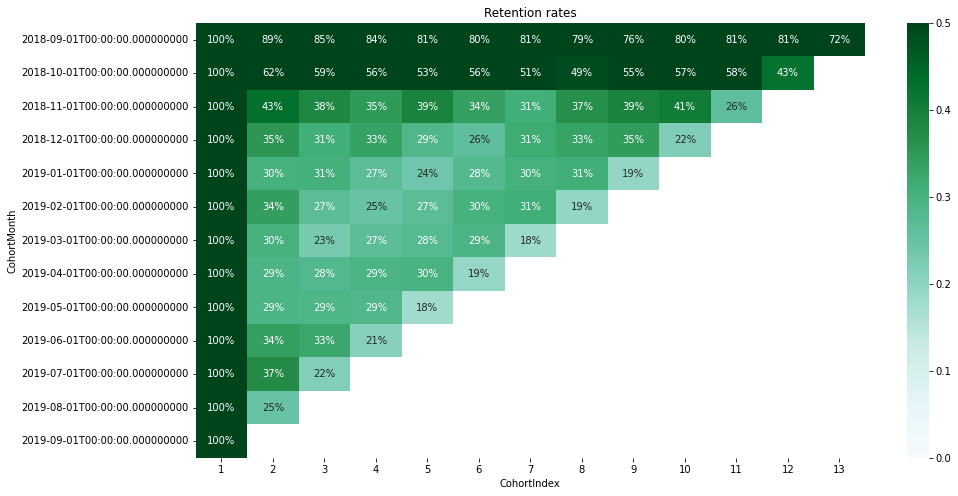

In [32]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
plt.show()